<h3>Import the necessary libraries</h3>

In [270]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Read the data</h3>

In [271]:
#Data range is from 07-2003 to 07-2023. So a total of 20 years
df=pd.read_csv("Data/housing_full.csv")
df.drop(columns=['DATE'],inplace=True)

#Find out information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CSUSHPISA      241 non-null    float64
 1   PERMIT1        241 non-null    float64
 2   EMRATIO        241 non-null    float64
 3   HSN1F          241 non-null    float64
 4   HNFSEPUSSA     241 non-null    float64
 5   HOUST1F        241 non-null    float64
 6   COMPU1USA      241 non-null    float64
 7   TLRESCONS      241 non-null    float64
 8   GDP            241 non-null    float64
 9   HOUSTSFLAA1FQ  241 non-null    float64
 10  DRSFRMACBS     241 non-null    float64
 11  RSAHORUSQ156S  241 non-null    float64
dtypes: float64(12)
memory usage: 22.7 KB


<h3>Describe the dataset</h3>

In [272]:
df.describe()

,CSUSHPISA,PERMIT1,EMRATIO,HSN1F,HNFSEPUSSA,HOUST1F,COMPU1USA,TLRESCONS,GDP,HOUSTSFLAA1FQ,DRSFRMACBS,RSAHORUSQ156S
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,185.401556,877.643154,60.121162,657.356846,320.975104,904.377593,903.091286,504098.261411,17760.028544,2518.182573,4.859502,66.136100
std,45.081833,377.867246,1.909605,287.514473,120.784965,387.685260,376.421993,189307.658413,4046.173855,98.424656,3.304829,1.797473
min,133.777000,337.000000,51.300000,270.000000,142.000000,353.000000,368.000000,244399.000000,11566.669000,2334.000000,1.410000,63.100000
25%,149.963000,615.000000,58.700000,433.000000,216.000000,608.000000,601.000000,348206.000000,14608.209000,2462.333333,2.080000,64.600000
50%,174.792000,799.000000,59.900000,593.000000,310.000000,835.000000,841.000000,511582.000000,16953.838000,2508.666667,3.486667,65.900000
75%,202.907000,1085.000000,62.000000,778.000000,418.000000,1116.000000,1029.000000,594003.000000,20580.912000,2580.333333,7.770000,67.800000
max,306.634000,1798.000000,63.400000,1389.000000,572.000000,1823.000000,1911.000000,979044.000000,27623.543000,2736.000000,11.480000,69.400000


<h3>Display first 5 rows of the dataset</h3>

In [273]:
df.head()

,CSUSHPISA,PERMIT1,EMRATIO,HSN1F,HNFSEPUSSA,HOUST1F,COMPU1USA,TLRESCONS,GDP,HOUSTSFLAA1FQ,DRSFRMACBS,RSAHORUSQ156S
0,133.777,1478.0,62.1,1168.0,342.0,1535.0,1424.0,454040.0,11566.669000,2334.000000,1.730000,68.300000
1,134.969,1521.0,62.1,1206.0,346.0,1484.0,1329.0,458676.0,11635.190667,2341.666667,1.740000,68.366667
2,136.294,1533.0,62.0,1131.0,350.0,1555.0,1413.0,463954.0,11703.712333,2349.333333,1.750000,68.433333
3,137.531,1566.0,62.1,1144.0,361.0,1631.0,1479.0,475234.0,11772.234000,2357.000000,1.760000,68.500000
4,138.794,1513.0,62.3,1093.0,366.0,1694.0,1439.0,490441.0,11822.638333,2359.666667,1.723333,68.566667


<h3>Standardize the columns of the dataset</h3>

In [274]:
scaler=StandardScaler().fit(df)
df_scaled=pd.DataFrame(scaler.transform(df), columns=df.columns)
df_scaled.head()

,CSUSHPISA,PERMIT1,EMRATIO,HSN1F,HNFSEPUSSA,HOUST1F,COMPU1USA,TLRESCONS,GDP,HOUSTSFLAA1FQ,DRSFRMACBS,RSAHORUSQ156S
0,-1.147513,1.592110,1.038412,1.779757,0.174431,1.630020,1.386722,-0.264978,-1.533856,-1.875200,-0.948919,1.206362
1,-1.121017,1.706144,1.038412,1.912199,0.207617,1.498196,1.133821,-0.240438,-1.516886,-1.797144,-0.945887,1.243529
2,-1.091565,1.737967,0.985936,1.650800,0.240802,1.681716,1.357439,-0.212500,-1.499916,-1.719088,-0.942855,1.280695
3,-1.064069,1.825481,1.038412,1.696109,0.332063,1.878159,1.533139,-0.152790,-1.482946,-1.641032,-0.939823,1.317861
4,-1.035995,1.684928,1.143363,1.518358,0.373545,2.041000,1.426654,-0.072293,-1.470462,-1.613882,-0.950941,1.355028


<h3>Generate a heatmap</h3>

<ol>
<li>This heatmap shows the correlation between all variables in the dataset.</li>
<li>Take note of the first row of the heatmap. This is the relationship of all variables to the target 'y' variable.</li>
</ol>

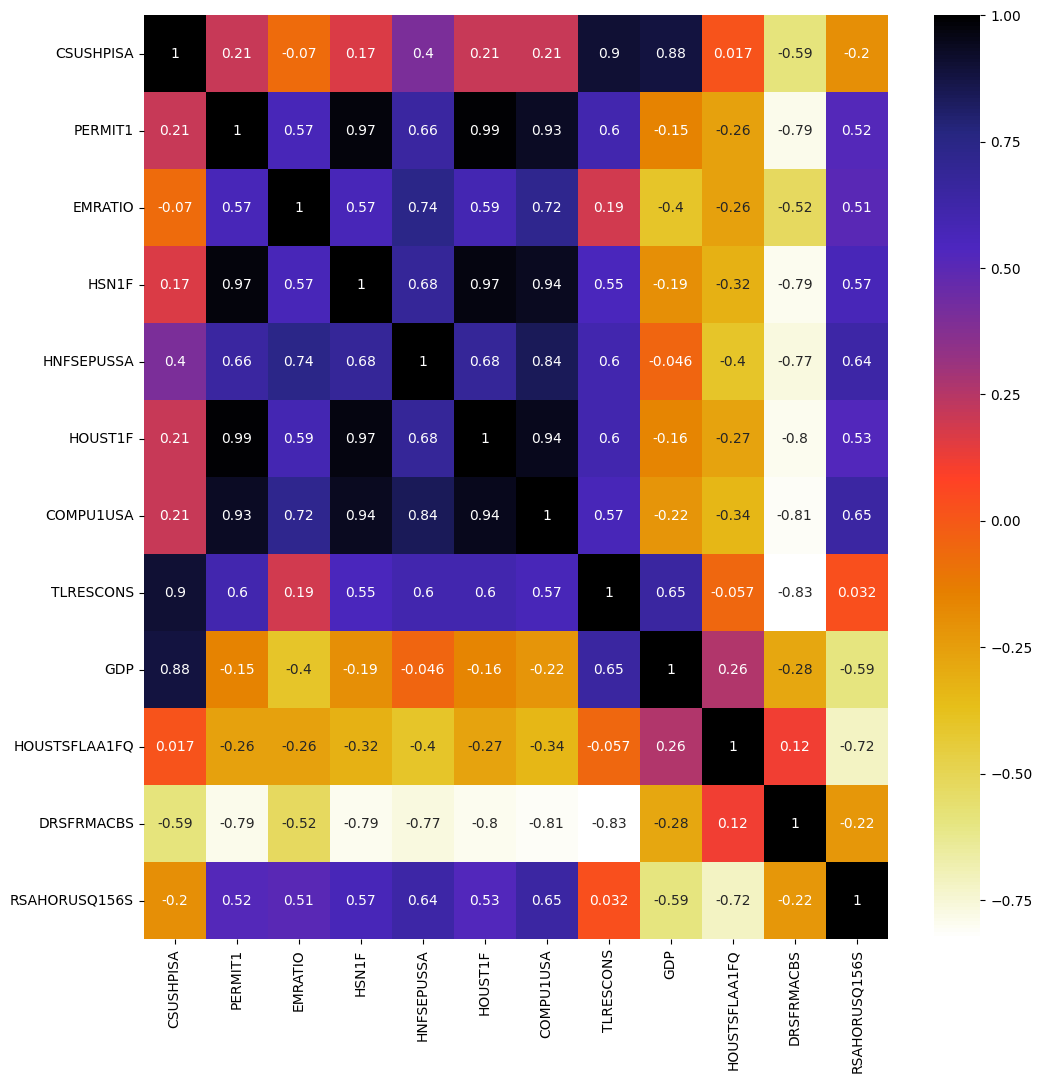

In [275]:
cor_obj=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor_obj,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

<h3>Feature Selection</h3>

For each model, we use the 'wrapper' method in backward direction to find the best features for each model.
<br><br>
<h3>Model training</h3>

We shall train different models, and compare the scores obtained by each one of them
The models considered here are:
<ol>
<li>Linear Regression</li>
<li>Ridge Regression</li>
<li>Lasso Regression</li>
<li>Elastic Net Regression</li>
</ol>

Model scoring would be the R-squared value of a model

In [276]:
Y=df_scaled['CSUSHPISA']
df_scaled.drop(columns=['CSUSHPISA'],inplace=True)
X=df_scaled

In [277]:
"""
The workflow of this code block is as follows:
1)Traverse through each model in a for loop
2)For a model, use Sequential feature selector to find out the best features
3)Fit the model beased on the best features
4)Find out the best features
"""
modelList=[LinearRegression(),Ridge(),Lasso(),ElasticNet()]
modelDict={0:"Linear Regression",1:"Ridge Regression",2:"Lasso Regression",3:"Elastic Net Regression"}

for i in range(len(modelDict)):
    modelObj = modelList[i]

    #Use sequential feature selector to find out the best features for each model.
    #Once the best features for a model is found out, fit the model and find scores on the test dataset.
    sfs=SequentialFeatureSelector(estimator=modelObj,n_features_to_select='auto',direction='backward',scoring='neg_mean_squared_error')
    sfs.fit(X.to_numpy(),Y.to_numpy())

    df_mask=sfs.get_support()
    good_columns=df_scaled.columns[df_mask]

    X_train,X_test,Y_train,Y_test=train_test_split(X[good_columns].to_numpy(),Y.to_numpy(),random_state=0,test_size=0.2,shuffle=True)

    #Fit the model
    modelObj.fit(X_train, Y_train)

    #Calculate the scores based on the testing dataset
    model_score=modelObj.score(X_test, Y_test)
    if i==0:
        bestScore=model_score
        bestKey=0
        bestFeatures=list(good_columns)
    else:
        if model_score>bestScore:
            bestKey=i
            bestScore=model_score
            bestFeatures=list(good_columns)
    print(f"{modelDict[i]} model has a score of {round(model_score,5)} with best features {list(good_columns)}")

print("\n")
print(f"The best model was found out to be {modelDict[bestKey]} with a score of {round(bestScore,5)}. \nThe best features for {modelDict[bestKey]} model was {bestFeatures}")

Linear Regression model has a score of 0.99203 with best features ['PERMIT1', 'EMRATIO', 'HOUST1F', 'TLRESCONS', 'GDP', 'RSAHORUSQ156S']
Ridge Regression model has a score of 0.99065 with best features ['PERMIT1', 'HSN1F', 'TLRESCONS', 'GDP', 'DRSFRMACBS', 'RSAHORUSQ156S']
Lasso Regression model has a score of -0.07447 with best features ['HOUST1F', 'COMPU1USA', 'GDP', 'HOUSTSFLAA1FQ', 'DRSFRMACBS', 'RSAHORUSQ156S']
Elastic Net Regression model has a score of 0.51527 with best features ['COMPU1USA', 'TLRESCONS', 'GDP', 'HOUSTSFLAA1FQ', 'DRSFRMACBS', 'RSAHORUSQ156S']


The best model was found out to be Linear Regression with a score of 0.99203. 
The best features for Linear Regression model was ['PERMIT1', 'EMRATIO', 'HOUST1F', 'TLRESCONS', 'GDP', 'RSAHORUSQ156S']
